# Visualization of Throwing Dice

1. 6 kauliņi

 Uztaisiet 100 000 garu sarakstu ar 6 metam kauliņu summu. (6 metienu summa vienā mērijumā) 

Saskaitiet šo summu biežumu (izmantojam Counter)

Attēlojam stabiņu( vai kādā citā) diagrammā.

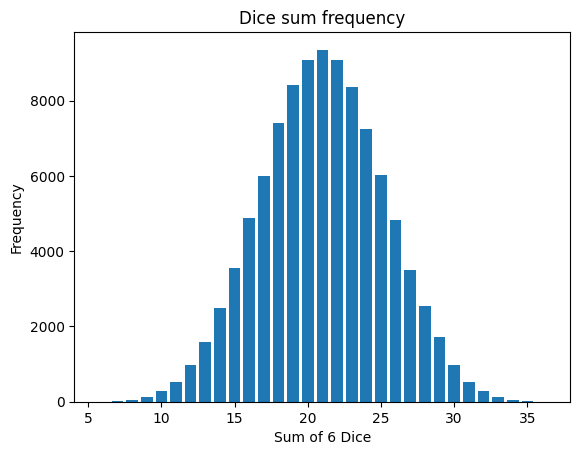

In [1]:
import random
 
import matplotlib.pyplot as plt
 
 
sums = [sum(random.randint(1, 6) for _ in range(6)) for _ in range(100000)]
 
 
sum_counts = {i: sums.count(i) for i in range(6, 6*6+1)}
 
 
plt.bar(sum_counts.keys(), sum_counts.values())
plt.xlabel('Sum of 6 Dice')
plt.ylabel('Frequency')
plt.title('Dice sum frequency')
plt.show()

In [2]:
# let's refactor the throw of dice into a function
from collections import Counter
def throw_dice(n):
    """Throw n dice and return their sum."""	
    return sum(random.randint(1, 6) for _ in range(n))

# now function to get throws of n dice num_throws times
def get_sums(n, num_throws):
    """Get num_throws sums of n dice as a list."""
    return [throw_dice(n) for _ in range(num_throws)]

# get counts of sums of n dice num_throws times
def get_sum_counts(throw_list):
    """Get counts of sums of n dice as a Counter."""
    counts = Counter(throw_list)
    # let's arrange them from smallest key to largest
    # in other words we order by key
    return {k: counts[k] for k in sorted(counts)} # we sort keys and return a dictionary not Counter

# now we can use these functions to get the sum counts for 6 dice
sums = get_sums(6, 100000)
sum_counts = get_sum_counts(sums)
# print sum_counts
print(sum_counts)

{6: 2, 7: 13, 8: 55, 9: 97, 10: 268, 11: 573, 12: 949, 13: 1574, 14: 2498, 15: 3483, 16: 4791, 17: 6059, 18: 7410, 19: 8436, 20: 9088, 21: 9357, 22: 9032, 23: 8366, 24: 7478, 25: 6119, 26: 4817, 27: 3549, 28: 2447, 29: 1582, 30: 990, 31: 535, 32: 239, 33: 127, 34: 48, 35: 15, 36: 3}


In [3]:
# let's add a function to throw dice and plot the results
def plot_dice_sums(num_dice, num_throws):
    """Plot the sums of n dice thrown num_throws times."""
    sums = get_sums(num_dice, num_throws)
    sum_counts = get_sum_counts(sums)
    plt.bar(sum_counts.keys(), sum_counts.values())
    plt.xlabel(f'Sum of {num_dice} Dice')
    plt.ylabel('Frequency')
    plt.title('Dice sum frequency')
    plt.show()

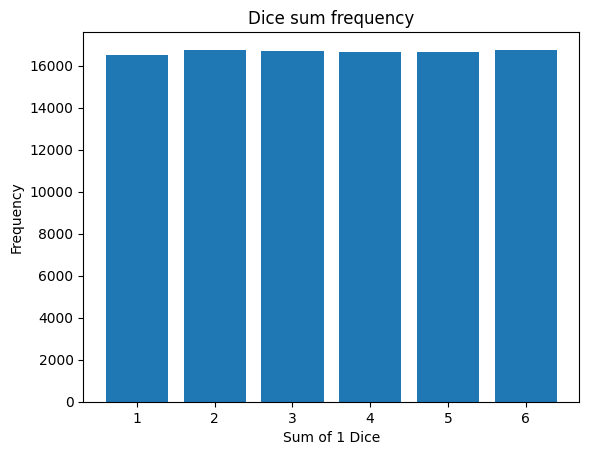

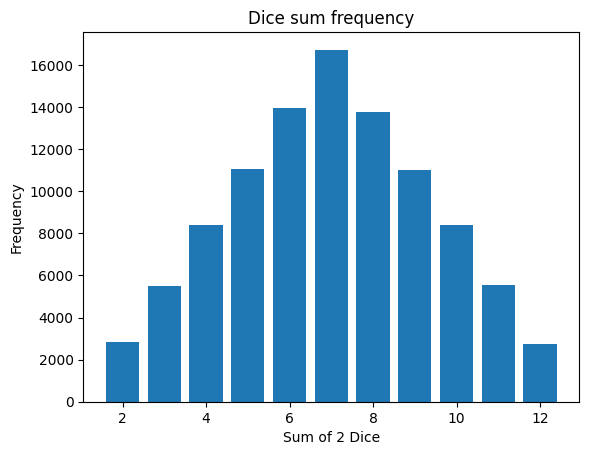

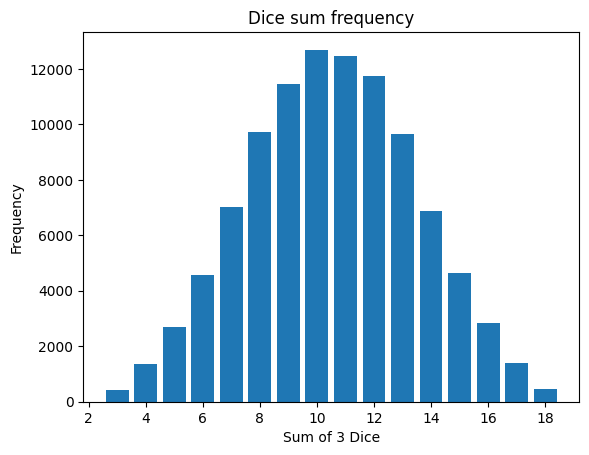

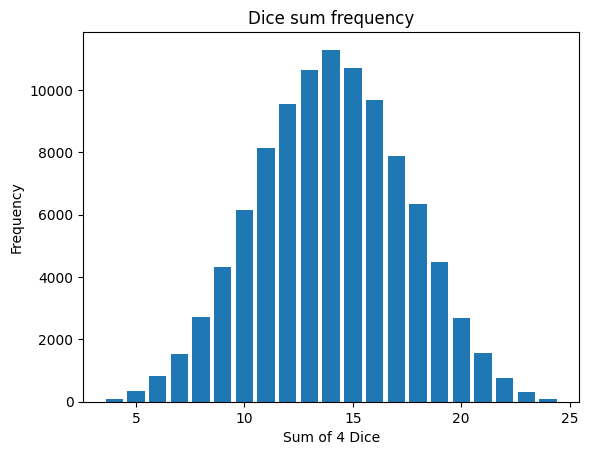

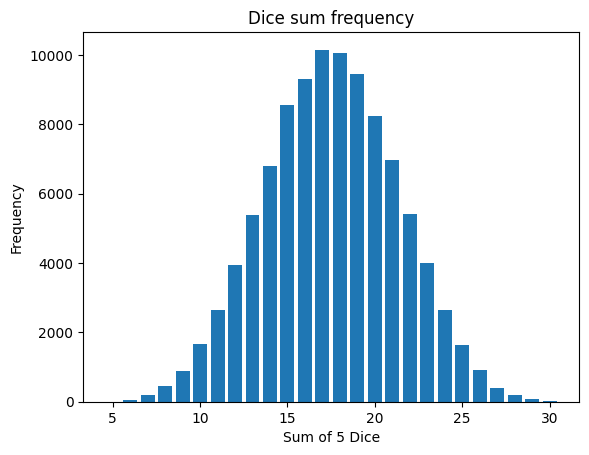

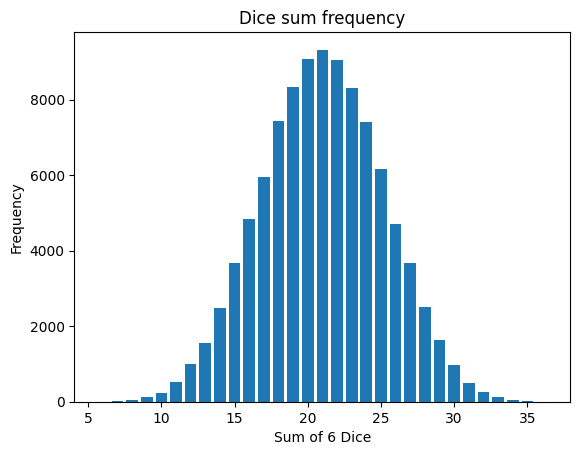

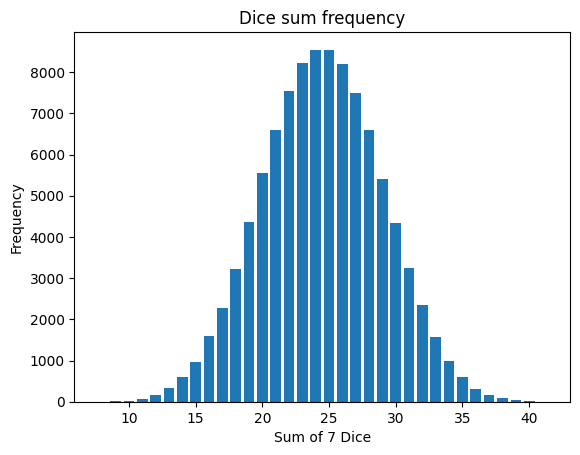

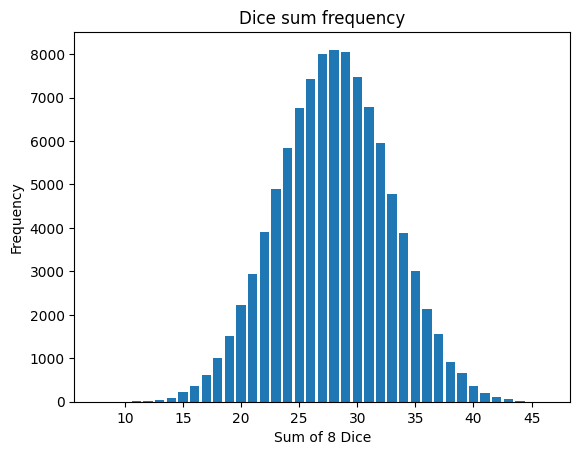

In [4]:
# now let's test our 100_000 throws with 1 to 8 dice
for dice_count in range(1, 9):
    plot_dice_sums(dice_count, 100_000)

## Bell shaped curve

Šī ir viena no visbiežāk sastopamajām izkliedēm, kas ir simetriska attiecībā pret vidējo vērtību.

### Normal, standard distribution

Wikipedia on standard distribution: https://en.wikipedia.org/wiki/Normal_distribution

![Standard Deviation](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/800px-Standard_deviation_diagram_micro.svg.png)

## Plotly Library

Alternative to matplotlib is Plotly. It is more interactive and has more features.

Official documentation: https://plotly.com/python/

In [5]:
# try importing Plotly
try:
    import plotly.express as px
    print("Plotly is installed.")
except ImportError:
    print("Plotly is not installed. Please install it with 'pip install plotly'")

Plotly is not installed. Please install it with 'pip install plotly'


In [ ]:
# create function to generate throws and plot them with Plotly
def plot_dice_sums_plotly(num_dice, num_throws):
    """Plot the sums of n dice thrown num_throws times."""
    sums = get_sums(num_dice, num_throws)
    sum_counts = get_sum_counts(sums)
    fig = px.bar(x=sum_counts.keys(), y=sum_counts.values(), labels={'x': f'Sum of {num_dice} Dice', 'y': 'Frequency'},
                 title='Dice sum frequency')
    fig.show()